# Potential Talents Recommendation Based on a Search Term and Ranking. 

<hr style="height:2px;border-width:10;color:blue;background-color:black">
    

   

## Goal: Predict how fit the candidate is based on their available information (variable fit)

### Tasks:

Ranking candidates based on a fitness score.

Re-ranking candidates when a candidate is starred.


### Data Description:

The data comes from  sourcing efforts. Any field that could directly reveal personal details and gave a unique identifier for each candidate are removed.

### Attributes:
id : unique identifier for candidate (numeric)

job_title : job title for candidate (text)

location : geographical location for candidate (text)

connections: number of connections candidate has, 500+ means over 500 (text)

### Output (desired target):
fit - how fit the candidate is for the role? (numeric, probability between 0-1)

### Keywords: “Aspiring human resources” or “seeking human resources”

# Exploring and analysing the data.

In [1]:
# import main modules 
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
# open a dataset
dfs = pd.read_excel('potential-talents.xlsx')
dfs.head()

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500+,NaN
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,People Development Coordinator at Ryan,"Denton, Texas",500+,NaN
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500+,NaN


In [8]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          104 non-null    int64  
 1   job_title   104 non-null    object 
 2   location    104 non-null    object 
 3   connection  104 non-null    object 
 4   fit         0 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.2+ KB


In this dataset 5 columns and 104 rows and ni missing values except a full column "fit" but it is for later use to fill it in with similarity score.







Data types are not fully ready for analyzing and processing so some of them is better to convert to appropriate data types.

In [3]:
dfs['connection'] = dfs['connection'].astype('string')

In [10]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          104 non-null    int64  
 1   job_title   104 non-null    object 
 2   location    104 non-null    object 
 3   connection  104 non-null    string 
 4   fit         0 non-null      float64
dtypes: float64(1), int64(1), object(2), string(1)
memory usage: 4.2+ KB


In [4]:
#replace - characters
dfs['connection'] = dfs['connection'].str.replace("+", " ")

In [5]:
dfs['connection'] = dfs['connection'].astype(int)
dfs

,id,job_title,location,connection,fit
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,NaN
1,2,Native English Teacher at EPIK (English Progra...,Kanada,500,NaN
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,NaN
3,4,People Development Coordinator at Ryan,"Denton, Texas",500,NaN
4,5,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500,NaN
...,...,...,...,...,...
99,100,Aspiring Human Resources Manager | Graduating ...,"Cape Girardeau, Missouri",103,NaN
100,101,Human Resources Generalist at Loparex,"Raleigh-Durham, North Carolina Area",500,NaN
101,102,Business Intelligence and Analytics at Travelers,Greater New York City Area,49,NaN
102,103,Always set them up for Success,Greater Los Angeles Area,500,NaN


In [6]:
dfs = dfs.convert_dtypes()

In [7]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          104 non-null    Int64 
 1   job_title   104 non-null    string
 2   location    104 non-null    string
 3   connection  104 non-null    Int32 
 4   fit         0 non-null      Int64 
dtypes: Int32(1), Int64(2), string(2)
memory usage: 4.1 KB


Now, all data types are ready for processing.

At this point I want to explore  job titles in terms of the number of words in it.

In [12]:
from collections import Counter
words_counts = Counter()
for i in range(len(dfs)):
    for word in dfs.job_title[i].split(" "):
        words_counts[word] += 1

print('Number of total words', len(words_counts))
common = words_counts.most_common()
common = common[:15]

Number of total words 221


# 

At this point I want to explore and visualize  how many times a word presents in job titles and which is the most popular.

<AxesSubplot:>

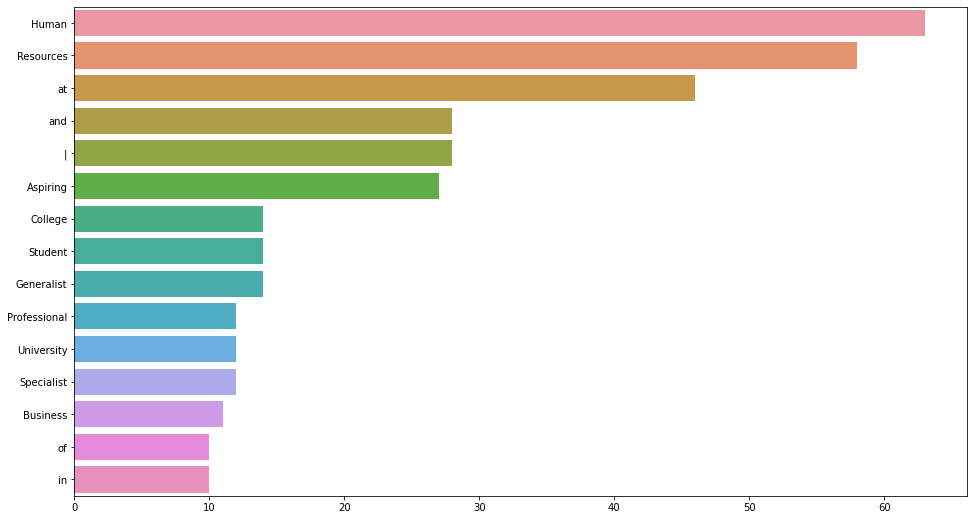

In [16]:
plt.figure(figsize = (16,9))
most_common_uni = dict(common)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

# 

At this point I keep exploring  and count how many times the  job titles are identical.

In [17]:
dfs.job_title.value_counts()

Aspiring Human Resources Professional                                                                                    7
Student at Humber College and Aspiring Human Resources Generalist                                                        7
2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional                 7
People Development Coordinator at Ryan                                                                                   6
HR Senior Specialist                                                                                                     5
Native English Teacher at EPIK (English Program in Korea)                                                                5
Aspiring Human Resources Specialist                                                                                      5
Student at Chapman University                                                                                            4
Seeking Human Re

# 

Visualizing the same result.

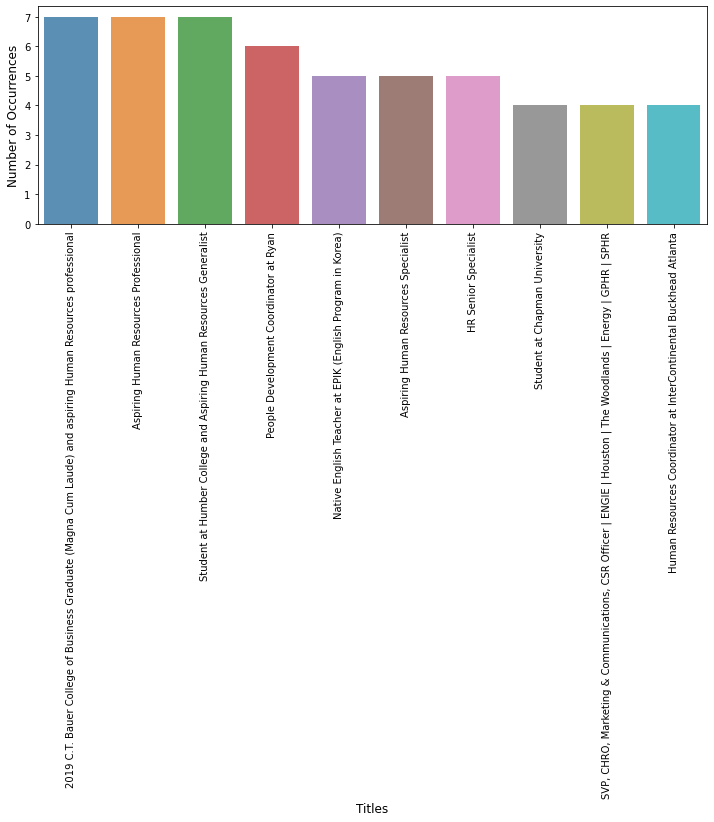

In [18]:
import seaborn as sns
counted_words = Counter(dfs.job_title)
counted_df = pd.DataFrame(counted_words.items(), columns=['titles', 'count']).sort_values('count', ascending=False) #create new df from counter

plt.figure(figsize=(12,4))
sns.barplot(data=counted_df[:10], x='titles', y='count', alpha=0.8) #plot only the top 10 by slicing the df
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Titles', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In the next section I explore how many times each location presents in the data and visualizing the same result.

In [19]:
dfs.location.value_counts()

Kanada                                 12
Raleigh-Durham, North Carolina Area     8
Houston, Texas Area                     8
Houston, Texas                          7
Greater New York City Area              7
Denton, Texas                           6
Greater Philadelphia Area               5
San Francisco Bay Area                  5
Lake Forest, California                 4
Atlanta, Georgia                        4
İzmir, Türkiye                          4
Austin, Texas Area                      2
Greater Atlanta Area                    2
Amerika Birleşik Devletleri             2
Chicago, Illinois                       2
Milpitas, California                    1
Greater Grand Rapids, Michigan Area     1
Dallas/Fort Worth Area                  1
Jackson, Mississippi Area               1
Baltimore, Maryland                     1
Monroe, Louisiana Area                  1
Las Vegas, Nevada Area                  1
Bridgewater, Massachusetts              1
Kokomo, Indiana Area              

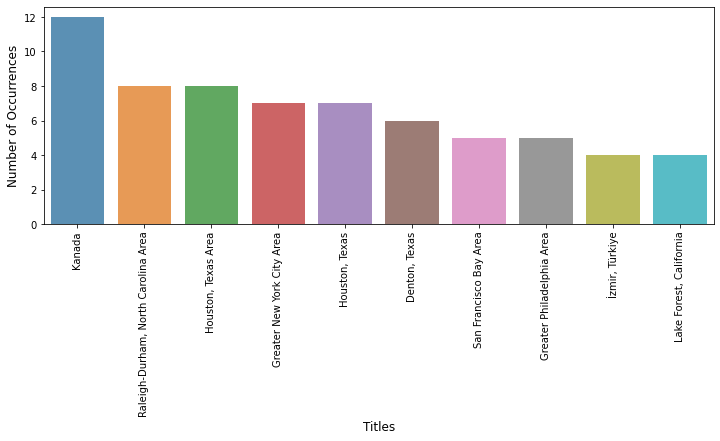

In [20]:
import seaborn as sns
counted_words = Counter(dfs.location)
counted_df = pd.DataFrame(counted_words.items(), columns=['titles', 'count']).sort_values('count', ascending=False) #create new df from counter

plt.figure(figsize=(12,4))
sns.barplot(data=counted_df[:10], x='titles', y='count', alpha=0.8) #plot only the top 10 by slicing the df
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Titles', fontsize=12)
plt.xticks(rotation=90)
plt.show()

# 

Important function of tokenization can be used next for  cleaning text  to make texts good for mathematical processing.

In [7]:
# import libraries
import nltk
nltk.download(['punkt', 'wordnet'])
nltk.download('stopwords')
import re
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer


def tokenize(text):

    text = re.sub(r"[^a-zA-Z0-9]", ' ', text)
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:
        
        clean_tok = lemmatizer.lemmatize(tok, pos = 'v').lower().strip()
        
        clean_tokens.append(clean_tok)
    clean_tokens = [w for w in clean_tokens if w not in stopwords.words("english")]

    return clean_tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Creating a list of job titles for computing cosine similarity.

In [8]:
joblist = list(dfs.job_title)
joblist

['2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional',
 'Native English Teacher at EPIK (English Program in Korea)',
 'Aspiring Human Resources Professional',
 'People Development Coordinator at Ryan',
 'Advisory Board Member at Celal Bayar University',
 'Aspiring Human Resources Specialist',
 'Student at Humber College and Aspiring Human Resources Generalist',
 'HR Senior Specialist',
 'Student at Humber College and Aspiring Human Resources Generalist',
 'Seeking Human Resources HRIS and Generalist Positions',
 'Student at Chapman University',
 'SVP, CHRO, Marketing & Communications, CSR Officer | ENGIE | Houston | The Woodlands | Energy | GPHR | SPHR',
 'Human Resources Coordinator at InterContinental Buckhead Atlanta',
 '2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional',
 '2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professiona

In [16]:
Xfulltoken = tokenize(str(joblist))
Xfulltoken

['2019',
 'c',
 'bauer',
 'college',
 'business',
 'graduate',
 'magna',
 'cum',
 'laude',
 'aspire',
 'human',
 'resources',
 'professional',
 'native',
 'english',
 'teacher',
 'epik',
 'english',
 'program',
 'korea',
 'aspiring',
 'human',
 'resources',
 'professional',
 'people',
 'development',
 'coordinator',
 'ryan',
 'advisory',
 'board',
 'member',
 'celal',
 'bayar',
 'university',
 'aspiring',
 'human',
 'resources',
 'specialist',
 'student',
 'humber',
 'college',
 'aspiring',
 'human',
 'resources',
 'generalist',
 'hr',
 'senior',
 'specialist',
 'student',
 'humber',
 'college',
 'aspiring',
 'human',
 'resources',
 'generalist',
 'seeking',
 'human',
 'resources',
 'hris',
 'generalist',
 'positions',
 'student',
 'chapman',
 'university',
 'svp',
 'chro',
 'marketing',
 'communications',
 'csr',
 'officer',
 'engie',
 'houston',
 'woodlands',
 'energy',
 'gphr',
 'sphr',
 'human',
 'resources',
 'coordinator',
 'intercontinental',
 'buckhead',
 'atlanta',
 '2019',
 '

### Cosine similarity computation with TfIdf Vectorizer that will create matrices of job titles and  a search term(target candidate title).

Vectorizing job titles.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
# import libraries
import nltk
nltk.download(['punkt', 'wordnet'])
# Create TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Generate matrix of word vectors
tfidf_matrix = vectorizer.fit_transform(joblist)

# Print the shape of tfidf_matrix
#print(tfidf_matrix.shape)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Declaring the search term and vectorizing it.

In [10]:
search_term =['Aspiring Human resources']
#to vectorize  it
#search_termtok = tokenize(search_term)
search_term_vector = vectorizer.transform(search_term)

In [11]:
tfidf_matrixarray = tfidf_matrix.toarray()
searchtermarray = search_term_vector.toarray() 

Cosine similarity score of  job titles and the search term. 

In [12]:
from sklearn.metrics.pairwise import cosine_similarity
sim_score_list = cosine_similarity(tfidf_matrixarray, searchtermarray)

In [13]:
dfs['similarity'] = sim_score_list

In [14]:
sorteddf = dfs.sort_values(['similarity'], ascending=False)

In [15]:
sorteddf.head(60)

,id,job_title,location,connection,fit,similarity
32,33,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,<NA>,0.753591
96,97,Aspiring Human Resources Professional,"Kokomo, Indiana Area",71,<NA>,0.753591
16,17,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,<NA>,0.753591
45,46,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,<NA>,0.753591
57,58,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,<NA>,0.753591
20,21,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,<NA>,0.753591
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,<NA>,0.753591
5,6,Aspiring Human Resources Specialist,Greater New York City Area,1,<NA>,0.695679
23,24,Aspiring Human Resources Specialist,Greater New York City Area,1,<NA>,0.695679
59,60,Aspiring Human Resources Specialist,Greater New York City Area,1,<NA>,0.695679


In this step I want to fill in a "fit" column based on cosine similarity score. Respectfully, 1 I will give for a "FIT" and 0  I will give for "NOT FIT".  I will use a threshold where the similarity score starts to have more wrong candidates or very different from the actual search term. Also, I will create labels 1 and 0 for diffirentiation of good and bad candidates.

In [16]:
fitted= [] 
for i in sorteddf['similarity']:
    if i > 0.279124: # 0.279124 is a threshold  of fittness of candidates
       fitted.append(1) 
    elif i < 0.279124: 
       fitted.append(0) 

In [17]:
sorteddf['fit'] = fitted

In [18]:
sorteddf.fit.value_counts()

0    75
1    29
Name: fit, dtype: int64

The threshold  created 75 of bad candidates and 29 good candidates based on the cosine similarity.

In [19]:
sorteddf.head(40)

,id,job_title,location,connection,fit,similarity
32,33,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591
96,97,Aspiring Human Resources Professional,"Kokomo, Indiana Area",71,1,0.753591
16,17,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591
45,46,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591
57,58,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591
20,21,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591
5,6,Aspiring Human Resources Specialist,Greater New York City Area,1,1,0.695679
23,24,Aspiring Human Resources Specialist,Greater New York City Area,1,1,0.695679
59,60,Aspiring Human Resources Specialist,Greater New York City Area,1,1,0.695679


So now you can see and select if a candidate is a good fit or not based on cosine similarity score. But Cosine Similarity score is not the best method to apply as there are other methods to test the similarity. I will test them later in the project.

# 

# In this section I will test a Recommendation System. Based on the search term to list similar job titles.

In [251]:
indices = pd.Series(dfs.index, index=dfs['job_title'])
pd.DataFrame(indices).head()

,0
job_title,
2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional,0
Native English Teacher at EPIK (English Program in Korea),1
Aspiring Human Resources Professional,2
People Development Coordinator at Ryan,3
Advisory Board Member at Celal Bayar University,4


In [252]:
job_title = dfs['job_title']

In [253]:
indices

job_title
2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional                   0
Native English Teacher at EPIK (English Program in Korea)                                                                  1
Aspiring Human Resources Professional                                                                                      2
People Development Coordinator at Ryan                                                                                     3
Advisory Board Member at Celal Bayar University                                                                            4
                                                                                                                        ... 
Aspiring Human Resources Manager | Graduating May 2020 | Seeking an Entry-Level Human Resources Position in St. Louis     99
Human Resources Generalist at Loparex                                                                              

In [287]:
def get_recommendations(job_title):
    # Get the index of the movie that matches the title
    idx = indices[job_title]
    # Get the pairwsie similarity scores
    sim_scores = list(enumerate(sim_score_list[idx]))
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores)
    # Get the scores for 10 most similar movies
    sim_scores = sim_scores[:]
    # Get the movie indices
    job_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    return dfs['job_title'].iloc[job_indices]

In [288]:
# Generate recommendations
get_recommendations("Aspiring Human Resources Professional")

0    2019 C.T. Bauer College of Business Graduate (...
1    Native English Teacher at EPIK (English Progra...
2                Aspiring Human Resources Professional
3               People Development Coordinator at Ryan
4      Advisory Board Member at Celal Bayar University
5                  Aspiring Human Resources Specialist
6    Student at Humber College and Aspiring Human R...
Name: job_title, dtype: string

In [256]:
jobid = dfs['id']

In [265]:
def find_similar_jobs(jobid):
        
    dot_prod = search_term_vector.dot(np.transpose(search_term_vector))
    # find the row of each movie id
    job_idx =  indices[jobid]

    # find the most similar movie indices - to start I said they need to be the same for all content
    similar_idxs = list(enumerate(sim_score_list[job_idx]))
    # Sort the movies based on the similarity scores
    similar_idxs  = sorted(similar_idxs)
    # Get the scores for 10 most similar movies
    similar_idxs  =    similar_idxs[1:21]
    job_indices = [i[0] for i in similar_idxs]
    # pull the movie titles based on the indices
    similar_jobs = np.array(dfs['job_title'].iloc[job_indices])

    return similar_jobs 

In [266]:
find_similar_jobs('Aspiring Human Resources Professional')

array(['Native English Teacher at EPIK (English Program in Korea)',
       'Aspiring Human Resources Professional',
       'People Development Coordinator at Ryan',
       'Advisory Board Member at Celal Bayar University',
       'Aspiring Human Resources Specialist',
       'Student at Humber College and Aspiring Human Resources Generalist'],
      dtype=object)

# 

# Testing  other embedding methods. 

# Word2Vec  

In [20]:
import multiprocessing

from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser

In [21]:
sent = [row.split() for row in dfs['job_title']]

In [22]:
phrases = Phrases(sent, min_count=30, progress_per=10000)


In [23]:
bigram = Phraser(phrases)
sentences = bigram[sent]


In [24]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
cores

4

In [25]:
w2v_model = Word2Vec()

In [26]:
w2v_model.build_vocab(sentences, progress_per=10000)


In [27]:
vocab = w2v_model.build_vocab(sentences, progress_per=10000)


In [28]:
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)


(3819, 24330)

In [29]:
w2v_model.init_sims(replace=True)


<ipython-input-29-c7757d71a30b>:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model.init_sims(replace=True)


In [30]:
w2v_model.wv.most_similar(positive=["Professional"])

[('Program', 0.35119104385375977),
 ('Resources', 0.32798928022384644),
 ('EPIK', 0.32133346796035767),
 ('Graduate', 0.32033294439315796),
 ('in', 0.3021804988384247),
 ('Seeking', 0.30140411853790283),
 ('aspiring', 0.2913748323917389),
 ('Teacher', 0.2874416708946228),
 ('Human', 0.2871939539909363),
 ('Bauer', 0.2846793234348297)]

In [31]:
w2v_model.wv.similarity("Specialist", 'professional')

0.3780286

In [32]:
w2v_model.wv.doesnt_match(["Specialist", 'professional' 'Korea'])

'Specialist'

In [33]:
strdf1 = str(dfs[dfs['fit'] == 1][['job_title']])
strdf2 = str(dfs[dfs['fit'] == 0][['job_title']])

Testing a word cloud.

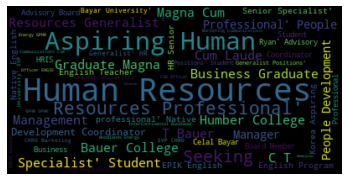

In [37]:
from wordcloud import WordCloud 
strjobs = str(joblist)
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(strjobs)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# GloVe 

In [34]:
joblists =  dfs['job_title'].tolist()
joblists[:4]

['2019 C.T. Bauer College of Business Graduate (Magna Cum Laude) and aspiring Human Resources professional',
 'Native English Teacher at EPIK (English Program in Korea)',
 'Aspiring Human Resources Professional',
 'People Development Coordinator at Ryan']

In [35]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Keras provides a Tokenizer class that can be fit on the training data, can convert text to sequences consistently by calling the texts_to_sequences() method on the Tokenizer class, and provides access to the dictionary mapping of words to integers in a word_index attribute.

In [36]:
# prepare tokenizer
token = Tokenizer()
token.fit_on_texts(joblist)

In [49]:
vocab_size = len(token.word_index) + 1
vocab_size 

204

In [38]:
# integer encode the documents
encoded_text = token.texts_to_sequences(joblist)

In [104]:
# pad documents to a max length of 120 words
max_length = 120
XXX = pad_sequences(encoded_text, maxlen = max_length, padding = 'post')

In [40]:
glove_vectors = dict()

Loading the entire GloVe word embedding file into memory as a dictionary of word to embedding array.

In [41]:
f = open('glove.6B.100d.txt', encoding = 'utf-8')
for line in f:
    values = line.split()
    word = values[0] ## The first entry is the word
    coefs = np.asarray(values[1:]) ## These are the vecotrs representing the embedding for the word
    glove_vectors[word] = coefs
f.close()


In [42]:
print('Loaded %s word vectors.' % len(glove_vectors))

Loaded 400000 word vectors.


In [43]:
# create a weight matrix for words in training docs
word_vector_matrix = np.zeros((vocab_size, 100))

In [44]:
for word, i in token.word_index.items():
    embedding_vector = glove_vectors.get(word)
    if embedding_vector is not None:
        word_vector_matrix[i] = embedding_vector

In [45]:
y =  sorteddf['fit'].values

In [46]:
sorteddf['fit'].value_counts()

0    75
1    29
Name: fit, dtype: int64

In [50]:
vec_size = 100

In [47]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding, LSTM, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

We chose the 100-dimensional version, therefore the Embedding layer must be defined with output_dim set to 100. Finally, we do not want to update the learned word weights in this model, therefore we will set the trainable attribute for the model to be False.

In [129]:
# define model
model = Sequential()
model.add(Embedding(vocab_size, vec_size, input_length=max_length, weights = [word_vector_matrix], trainable = False))
#model.add(Conv1D(64, 8, activation='relu'))
#model.add(MaxPooling1D(2))
#model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate = 0.001), metrics=['accuracy'])
# fit the model
history = model.fit(XXX, y, epochs = 500,  verbose = 0)

In [52]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 100)          20400     
                                                                 
 dense (Dense)               (None, 120, 64)           6464      
                                                                 
 dropout (Dropout)           (None, 120, 64)           0         
                                                                 
 dense_1 (Dense)             (None, 120, 16)           1040      
                                                                 
 global_max_pooling1d (Globa  (None, 16)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                      

In [53]:
# evaluate the model
loss, accuracy = model.evaluate(XXX, y, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 72.115386


Achieved 72.115386% accuracy.

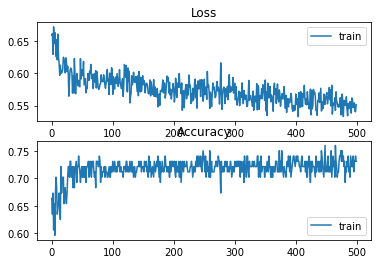

In [54]:
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')

plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')

plt.legend()
plt.show()

As it is seen from visualyzing of the model training progress, it trained itself with not bad results. So I can test the results on scoring the candidates.

In [55]:
def get_encode(x):
    x =  tokenize(x)
    x = token.texts_to_sequences(x)
    x = pad_sequences(x[:1], maxlen = max_length, padding = 'post')
    return x

In [56]:
model.predict(get_encode('Aspiring Human Resources Professional'))

array([[0.5706711]], dtype=float32)

In [57]:
GloveScore = []
for i in joblists:
    GloveScore.append(model.predict(get_encode(i)))
sorteddf['Glove_Score'] = GloveScore

In [58]:
sorteddf.head(40)

,id,job_title,location,connection,fit,similarity,Glove_Score
32,33,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591,[[0.5353272]]
96,97,Aspiring Human Resources Professional,"Kokomo, Indiana Area",71,1,0.753591,[[0.5022257]]
16,17,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591,[[0.5706711]]
45,46,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591,[[0.30586916]]
57,58,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591,[[0.4560116]]
20,21,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591,[[0.5706711]]
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591,[[0.27306324]]
5,6,Aspiring Human Resources Specialist,Greater New York City Area,1,1,0.695679,[[0.39473534]]
23,24,Aspiring Human Resources Specialist,Greater New York City Area,1,1,0.695679,[[0.27306324]]
59,60,Aspiring Human Resources Specialist,Greater New York City Area,1,1,0.695679,[[0.27940863]]


So far the results are still not perfect for taking into account the candidates but the model performance can be improved.

# BERT

In [59]:
from sentence_transformers import SentenceTransformer
# Build BERT_base model
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [60]:
# Convert job titles into BERT embedded vectors
bert_job_title_embeddings = bert_model.encode(list(sorteddf.job_title))
bert_job_title_embeddings.shape

(104, 768)

In [61]:
# Convert search phrase into a BERT embedded vector
bert_search_phrase_embedding = bert_model.encode(search_term)
bert_search_phrase_embedding.shape

(1, 768)

In [62]:
from scipy.spatial.distance import cosine
# Calculate cosine similarity between job title and search phrase vectors
bert_cosine_similarity = []
for i in range(len(sorteddf)):
    cos_sim = 1- cosine(bert_job_title_embeddings[i], bert_search_phrase_embedding.reshape(-1, 1))
    bert_cosine_similarity.append(cos_sim)
    
# Add BERT_cosine_similarity column in the pt dataframe
sorteddf['BERT_fit_score'] = bert_cosine_similarity

### BERT Model results comparing to cosine similarity

In [63]:
sorteddf.head(30)

,id,job_title,location,connection,fit,similarity,Glove_Score,BERT_fit_score
32,33,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591,[[0.5353272]],0.927214
96,97,Aspiring Human Resources Professional,"Kokomo, Indiana Area",71,1,0.753591,[[0.5022257]],0.927214
16,17,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591,[[0.5706711]],0.927214
45,46,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591,[[0.30586916]],0.927214
57,58,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591,[[0.4560116]],0.927214
20,21,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591,[[0.5706711]],0.927214
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591,[[0.27306324]],0.927214
5,6,Aspiring Human Resources Specialist,Greater New York City Area,1,1,0.695679,[[0.39473534]],0.942610
23,24,Aspiring Human Resources Specialist,Greater New York City Area,1,1,0.695679,[[0.27306324]],0.942610
59,60,Aspiring Human Resources Specialist,Greater New York City Area,1,1,0.695679,[[0.27940863]],0.942610


In [64]:
fittedbert= [] 
for i in sorteddf['BERT_fit_score']:
    if i > 0.740272: 
       fittedbert.append(1) 
    elif i < 0.740272: 
       fittedbert.append(0) 
sorteddf['fit'] = fittedbert

In [65]:
sorteddf.sort_values(by ='BERT_fit_score', ascending = False).head(30)

,id,job_title,location,connection,fit,similarity,Glove_Score,BERT_fit_score
5,6,Aspiring Human Resources Specialist,Greater New York City Area,1,1,0.695679,[[0.39473534]],0.942610
23,24,Aspiring Human Resources Specialist,Greater New York City Area,1,1,0.695679,[[0.27306324]],0.942610
59,60,Aspiring Human Resources Specialist,Greater New York City Area,1,1,0.695679,[[0.27940863]],0.942610
48,49,Aspiring Human Resources Specialist,Greater New York City Area,1,1,0.695679,[[0.27306324]],0.942610
35,36,Aspiring Human Resources Specialist,Greater New York City Area,1,1,0.695679,[[0.36690038]],0.942610
32,33,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591,[[0.5353272]],0.927214
16,17,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591,[[0.5706711]],0.927214
45,46,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591,[[0.30586916]],0.927214
57,58,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591,[[0.4560116]],0.927214
20,21,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591,[[0.5706711]],0.927214


In [66]:
sorteddf.fit.value_counts()

0    82
1    22
Name: fit, dtype: int64

The Bert Model performed better on Labeling candidates(less wrong candidates scored as good), but I have 82 of bad candidates and only 22 good candidates based on BERT model threshold.

# FastText

In [67]:
import os

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import nltk
from gensim.models import KeyedVectors
from sklearn.datasets import fetch_20newsgroups

In [68]:
FILE_PATH = 'wiki-news-300d-1M.vec'

In [69]:
# Let's read the first few lines 
with open(FILE_PATH) as f:
    for _ in range(5):
        print(f.readline()[:80])

1000000 300

, 0.1073 0.0089 0.0006 0.0055 -0.0646 -0.0600 0.0450 -0.0133 -0.0357 0.0430 -0.0
the 0.0897 0.0160 -0.0571 0.0405 -0.0696 -0.1237 0.0301 0.0248 -0.0303 0.0174 0.
. 0.0004 0.0032 -0.0204 0.0479 -0.0450 -0.1165 0.0142 0.0068 -0.0334 -0.0504 0.0
and -0.0314 0.0149 -0.0205 0.0557 0.0205 -0.0405 0.0044 -0.0118 -0.0424 -0.0490 


In [70]:
 #This may take a few mins
keyed_vec = KeyedVectors.load_word2vec_format(FILE_PATH)

In [71]:
for word in ['hello', '!', '2', 'Turing', 'foobarz', 'hi!']:
    print(word, "is in the vocabulary:", word in keyed_vec.key_to_index)

hello is in the vocabulary: True
! is in the vocabulary: True
2 is in the vocabulary: True
Turing is in the vocabulary: True
foobarz is in the vocabulary: False
hi! is in the vocabulary: False


In [72]:
word_vec = keyed_vec.get_vector('foobar')
print(word_vec.shape)
print(word_vec[:25])

(300,)
[-0.1366  0.0041  0.0905  0.0684 -0.0082  0.0175 -0.1518  0.1521  0.2366
 -0.1034  0.2554 -0.1798 -0.0465  0.2005 -0.1291  0.0709 -0.258  -0.212
 -0.0824  0.0465 -0.4044 -0.2766  0.004   0.3014  0.0622]


In [73]:
keras_embedding = keyed_vec.index_to_key 


In [74]:
def mean_fasttext(arr, embedding_dim=300):
    '''
    Create the average of the fasttext embeddings from each word in a document. 
    Very slow function, needs to be optimized for larger datasets
    '''
    mean_vectors = []
    for document in arr:
        tokens = nltk.tokenize.word_tokenize(document)
        vectors = [keyed_vec.get_vector(token) for token in tokens if token in keyed_vec.key_to_index]
        if vectors:
            mean_vec = np.vstack(vectors).mean(axis=0)
            mean_vectors.append(mean_vec)
        else:
            mean_vectors.append(np.zeros(embedding_dim))
    embedding = np.vstack(mean_vectors)
    return embedding

In [75]:
X_ = sorteddf['job_title'].values
y =  sorteddf['fit'].values

In [76]:
X_train =  mean_fasttext(X_)


In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
mode = LogisticRegression()
mode.fit(X_train, y)
print("Train Score:", f1_score(y, mode.predict(X_train)))


Train Score: 0.8421052631578948


In [78]:
Fastext = []
for i in X_train:
    Fastext.append(mode.predict((i.reshape(1, -1))))
sorteddf['FastTextScore'] = Fastext

In [79]:
sorteddf.head(30)

,id,job_title,location,connection,fit,similarity,Glove_Score,BERT_fit_score,FastTextScore
32,33,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591,[[0.5353272]],0.927214,[1]
96,97,Aspiring Human Resources Professional,"Kokomo, Indiana Area",71,1,0.753591,[[0.5022257]],0.927214,[1]
16,17,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591,[[0.5706711]],0.927214,[1]
45,46,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591,[[0.30586916]],0.927214,[1]
57,58,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591,[[0.4560116]],0.927214,[1]
20,21,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591,[[0.5706711]],0.927214,[1]
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591,[[0.27306324]],0.927214,[1]
5,6,Aspiring Human Resources Specialist,Greater New York City Area,1,1,0.695679,[[0.39473534]],0.942610,[1]
23,24,Aspiring Human Resources Specialist,Greater New York City Area,1,1,0.695679,[[0.27306324]],0.942610,[1]
59,60,Aspiring Human Resources Specialist,Greater New York City Area,1,1,0.695679,[[0.27940863]],0.942610,[1]


In [80]:
y_pred = mode.predict(X_train)

In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[82,  0],
       [ 6, 16]], dtype=int64)

6 candidates are missclassified.

Great,Predictions of the model match the Bert Model.

# 

# Learning to Rank(RankNet) (Pairwise)

LeakyReLU actication function.

In [82]:
import torch.nn as nn
class RankNet(nn.Module):
    
    def __init__(self, num_feature):
        super(RankNet, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(num_feature, 768),         
            nn.Dropout(0.2),                     
            nn.LeakyReLU(0.2, inplace=True),     
            nn.Linear(768, 256),
            nn.Dropout(0.2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 100),
            nn.Dropout(0.2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(100, 1),
            nn.Sigmoid())
        
        self.output_sig = nn.Sigmoid()

    def forward(self, input_1, input_2):
        s1 = self.model(input_1)
        s2 = self.model(input_2)
        out = self.output_sig(s1-s2)
        return out
    
    def predict(self, input_):
        s = self.model(input_)
        return s

In [83]:
import torch
random_row_1 = sorteddf.sample(n = 100, replace = True)
random_row_2 = sorteddf.sample(n = 100, replace = True)
job_title_list_ranknet1 = list(random_row_1['job_title'])
job_title_list_ranknet2 = list(random_row_2['job_title'])
doc_1 = bert_model.encode(job_title_list_ranknet1)
doc_2 = bert_model.encode(job_title_list_ranknet2)
doc_1 = torch.from_numpy(doc_1).float()
doc_2 = torch.from_numpy(doc_2).float()


In [84]:
y_1 = list(random_row_1['BERT_fit_score'])
y_2 = list(random_row_2['BERT_fit_score'])
y = torch.tensor([1.0 if y1_i>y2_i else 0.5 if y1_i==y2_i else 0.0 for y1_i, y2_i in zip(y_1, y_2)]).float()

y = y.unsqueeze(1)

In [85]:
def train_model(optim, lr_list, epoch, patience):
    # to track the training loss as the model trains
    losses = []

   


    model = RankNet(num_feature = 768)
    loss_fun = torch.nn.BCELoss()

    for lr in lr_list:
        if optim == 'SGD':
            optimizer = torch.optim.SGD(model.parameters(), lr = lr, momentum = 0.9)
        elif optim == 'Adam':
            optimizer = torch.optim.Adam(model.parameters(), lr = lr)
        print('lr: ', lr, 'optimizer: ', optim)
        epoch = epoch
        train_losses = []
        valid_losses = []

        for i in range(1, epoch+1):
            model.zero_grad()
            y_pred = model(doc_1, doc_2)
            loss = loss_fun(y_pred, y)
            loss.backward()
            optimizer.step()
            losses.append(loss.item())

            if i % 100 == 0:
                print('Epoch{}, loss : {}'.format(i, loss.item()))
        print('=' * 100)


        
    return  model, losses

Experimenting with learning rates and optimizers.

In [121]:
model, train_loss= train_model(optim='SGD', lr_list = [0.1, 0.01, 0.001, 0.0001, 0.00001], epoch=1000, patience=20)

lr:  0.1 optimizer:  SGD
Epoch100, loss : 0.4938143193721771
Epoch200, loss : 0.48873671889305115
Epoch300, loss : 0.4909581243991852
Epoch400, loss : 0.4901050925254822
Epoch500, loss : 0.4886341094970703
Epoch600, loss : 0.48331767320632935
Epoch700, loss : 0.48967036604881287
Epoch800, loss : 0.4890262484550476
Epoch900, loss : 0.48761051893234253
Epoch1000, loss : 0.48726609349250793
lr:  0.01 optimizer:  SGD
Epoch100, loss : 0.48535147309303284
Epoch200, loss : 0.491697758436203
Epoch300, loss : 0.4883703887462616
Epoch400, loss : 0.48488906025886536
Epoch500, loss : 0.48596805334091187
Epoch600, loss : 0.4867924451828003
Epoch700, loss : 0.4877910614013672
Epoch800, loss : 0.4874873459339142
Epoch900, loss : 0.48575058579444885
Epoch1000, loss : 0.48552119731903076
lr:  0.001 optimizer:  SGD
Epoch100, loss : 0.48561638593673706
Epoch200, loss : 0.48497673869132996
Epoch300, loss : 0.4864647686481476
Epoch400, loss : 0.4856998920440674
Epoch500, loss : 0.4842380881309509
Epoch600,

In [238]:
model, train_loss= train_model(optim='Adam', lr_list = [0.1, 0.01, 0.001, 0.0001, 0.00001], epoch=1000, patience=20)

lr:  0.1 optimizer:  Adam
Epoch100, loss : 0.697170078754425
Epoch200, loss : 0.7195723652839661
Epoch300, loss : 0.6931471228599548
Epoch400, loss : 0.6931471228599548
Epoch500, loss : 0.6931471228599548
Epoch600, loss : 0.6931471228599548
Epoch700, loss : 0.6931471228599548
Epoch800, loss : 0.6931471228599548
Epoch900, loss : 0.6931471228599548
Epoch1000, loss : 0.6931471228599548
lr:  0.01 optimizer:  Adam
Epoch100, loss : 0.6931471228599548
Epoch200, loss : 0.6931471228599548
Epoch300, loss : 0.6931471228599548
Epoch400, loss : 0.6931471228599548
Epoch500, loss : 0.6931471228599548
Epoch600, loss : 0.6931471228599548
Epoch700, loss : 0.6931471228599548
Epoch800, loss : 0.6931471228599548
Epoch900, loss : 0.6931471228599548
Epoch1000, loss : 0.6931471228599548
lr:  0.001 optimizer:  Adam
Epoch100, loss : 0.6931471228599548
Epoch200, loss : 0.6931471228599548
Epoch300, loss : 0.6931471228599548
Epoch400, loss : 0.6931471228599548
Epoch500, loss : 0.6931471228599548
Epoch600, loss : 0

Tanh activation function.

In [172]:
import torch.nn as nn
class RankNet(nn.Module):
    
    def __init__(self, num_feature):
        super(RankNet, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(num_feature, 768),         
            nn.Dropout(0.2),                     
            nn.Tanh(),     
            nn.Linear(768, 256),
            nn.Dropout(0.2),
            nn.Tanh(),
            nn.Linear(256, 100),
            nn.Dropout(0.2),
            nn.Tanh(),
            nn.Linear(100, 1),
            nn.Sigmoid())
        
        self.output_sig = nn.Sigmoid()

    def forward(self, input_1, input_2):
        s1 = self.model(input_1)
        s2 = self.model(input_2)
        out = self.output_sig(s1-s2)
        return out
    
    def predict(self, input_):
        s = self.model(input_)
        return s

In [173]:
import torch
random_row_1 = sorteddf.sample(n = 100, replace = True)
random_row_2 = sorteddf.sample(n = 100, replace = True)
job_title_list_ranknet1 = list(random_row_1['job_title'])
job_title_list_ranknet2 = list(random_row_2['job_title'])
doc_1 = bert_model.encode(job_title_list_ranknet1)
doc_2 = bert_model.encode(job_title_list_ranknet2)
doc_1 = torch.from_numpy(doc_1).float()
doc_2 = torch.from_numpy(doc_2).float()


In [259]:
doc_1.shape
doc_2.shape

torch.Size([100, 768])

In [174]:
y_1 = list(random_row_1['BERT_fit_score'])
y_2 = list(random_row_2['BERT_fit_score'])
y = torch.tensor([1.0 if y1_i>y2_i else 0.5 if y1_i==y2_i else 0.0 for y1_i, y2_i in zip(y_1, y_2)]).float()

y = y.unsqueeze(1)

In [178]:

def train_model(optim, lr_list, epoch, patience):
    # to track the training loss as the model trains
    losses = []

    


    model = RankNet(num_feature = 768)
    loss_fun = torch.nn.BCELoss()

    for lr in lr_list:
        if optim == 'SGD':
            optimizer = torch.optim.SGD(model.parameters(), lr = lr, momentum = 0.9)
        elif optim == 'Adam':
            optimizer = torch.optim.Adam(model.parameters(), lr = lr)
        print('lr: ', lr, 'optimizer: ', optim)
        epoch = epoch
        train_losses = []
        valid_losses = []

        for i in range(1, epoch+1):
            model.zero_grad()
            y_pred = model(doc_1, doc_2)
            loss = loss_fun(y_pred, y)
            loss.backward()
            optimizer.step()
            losses.append(loss.item())

            if i % 100 == 0:
                print('Epoch{}, loss : {}'.format(i, loss.item()))
        print('=' * 100)


        
    return  model, losses

In [87]:
model, train_loss= train_model(optim='SGD', lr_list = [0.1, 0.01, 0.001, 0.0001, 0.00001], epoch=1000, patience=20)

lr:  0.1 optimizer:  SGD
Epoch100, loss : 0.4785442650318146
Epoch200, loss : 0.48097315430641174
Epoch300, loss : 0.4828093647956848
Epoch400, loss : 0.48305484652519226
Epoch500, loss : 0.4865148961544037
Epoch600, loss : 0.4834268093109131
Epoch700, loss : 0.48144978284835815
Epoch800, loss : 0.4838276207447052
Epoch900, loss : 0.47506195306777954
Epoch1000, loss : 0.4816119074821472
lr:  0.01 optimizer:  SGD
Epoch100, loss : 0.47688254714012146
Epoch200, loss : 0.4774513244628906
Epoch300, loss : 0.4775054156780243
Epoch400, loss : 0.4797496795654297
Epoch500, loss : 0.4747828543186188
Epoch600, loss : 0.4775073230266571
Epoch700, loss : 0.47679436206817627
Epoch800, loss : 0.47774800658226013
Epoch900, loss : 0.48228561878204346
Epoch1000, loss : 0.4733408987522125
lr:  0.001 optimizer:  SGD
Epoch100, loss : 0.47780144214630127
Epoch200, loss : 0.4780721664428711
Epoch300, loss : 0.4753568768501282
Epoch400, loss : 0.47743910551071167
Epoch500, loss : 0.4784959554672241
Epoch600, 

In [180]:
model, train_loss= train_model(optim='SGD', lr_list = [0.01], epoch=2000, patience=20)


lr:  0.01 optimizer:  SGD
Epoch100, loss : 0.48562565445899963
Epoch200, loss : 0.4722420573234558
Epoch300, loss : 0.4692801237106323
Epoch400, loss : 0.46957674622535706
Epoch500, loss : 0.4679272174835205
Epoch600, loss : 0.4686742424964905
Epoch700, loss : 0.46865421533584595
Epoch800, loss : 0.4693228006362915
Epoch900, loss : 0.4691268801689148
Epoch1000, loss : 0.4700370132923126
Epoch1100, loss : 0.4680972993373871
Epoch1200, loss : 0.46794241666793823
Epoch1300, loss : 0.4671209752559662
Epoch1400, loss : 0.46714505553245544
Epoch1500, loss : 0.4681227505207062
Epoch1600, loss : 0.466756671667099
Epoch1700, loss : 0.4682762026786804
Epoch1800, loss : 0.4679461717605591
Epoch1900, loss : 0.4681738018989563
Epoch2000, loss : 0.4681110680103302


In [181]:
model, train_loss = train_model(optim='Adam', lr_list = [0.1, 0.01, 0.001, 0.0001, 0.00001], epoch=1000, patience=20)

lr:  0.1 optimizer:  Adam
Epoch100, loss : 0.608752429485321
Epoch200, loss : 0.5627829432487488
Epoch300, loss : 0.6349655389785767
Epoch400, loss : 0.6231248378753662
Epoch500, loss : 0.6239834427833557
Epoch600, loss : 0.6247211694717407
Epoch700, loss : 0.6247661113739014
Epoch800, loss : 0.62473464012146
Epoch900, loss : 0.6247620582580566
Epoch1000, loss : 0.6247674822807312
lr:  0.01 optimizer:  Adam
Epoch100, loss : 0.6247507929801941
Epoch200, loss : 0.4824364483356476
Epoch300, loss : 0.4794923663139343
Epoch400, loss : 0.4890846908092499
Epoch500, loss : 0.4832819402217865
Epoch600, loss : 0.5039921402931213
Epoch700, loss : 0.4921097159385681
Epoch800, loss : 0.4807605445384979
Epoch900, loss : 0.4667903780937195
Epoch1000, loss : 0.48790907859802246
lr:  0.001 optimizer:  Adam
Epoch100, loss : 0.4744143784046173
Epoch200, loss : 0.4694313406944275
Epoch300, loss : 0.47366684675216675
Epoch400, loss : 0.4738674461841583
Epoch500, loss : 0.47221964597702026
Epoch600, loss : 

In [182]:
model, train_loss= train_model(optim='SGD', lr_list = [0.01], epoch=2000, patience=20)

lr:  0.01 optimizer:  SGD
Epoch100, loss : 0.4837609827518463
Epoch200, loss : 0.47183501720428467
Epoch300, loss : 0.46991389989852905
Epoch400, loss : 0.4695179760456085
Epoch500, loss : 0.46734383702278137
Epoch600, loss : 0.46843841671943665
Epoch700, loss : 0.468290239572525
Epoch800, loss : 0.46905696392059326
Epoch900, loss : 0.467496782541275
Epoch1000, loss : 0.4697083532810211
Epoch1100, loss : 0.4690808951854706
Epoch1200, loss : 0.46848511695861816
Epoch1300, loss : 0.46836960315704346
Epoch1400, loss : 0.46893033385276794
Epoch1500, loss : 0.46651938557624817
Epoch1600, loss : 0.4693773686885834
Epoch1700, loss : 0.45957958698272705
Epoch1800, loss : 0.46158286929130554
Epoch1900, loss : 0.4605059325695038
Epoch2000, loss : 0.46019163727760315


ReLU activation function.

In [200]:
import torch.nn as nn
class RankNet(nn.Module):
    
    def __init__(self, num_feature):
        super(RankNet, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(num_feature, 768),         
            nn.Dropout(0.2),                     
            nn.ReLU(),     
            nn.Linear(768, 256),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.Linear(256, 100),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.Linear(100, 1),
            nn.Sigmoid())
        
        self.output_sig = nn.Sigmoid()

    def forward(self, input_1, input_2):
        s1 = self.model(input_1)
        s2 = self.model(input_2)
        out = self.output_sig(s1-s2)
        return out
    
    def predict(self, input_):
        s = self.model(input_)
        return s

In [201]:
import torch
random_row_1 = sorteddf.sample(n = 100, replace = True)
random_row_2 = sorteddf.sample(n = 100, replace = True)
job_title_list_ranknet1 = list(random_row_1['job_title'])
job_title_list_ranknet2 = list(random_row_2['job_title'])
doc_1 = bert_model.encode(job_title_list_ranknet1)
doc_2 = bert_model.encode(job_title_list_ranknet2)
doc_1 = torch.from_numpy(doc_1).float()
doc_2 = torch.from_numpy(doc_2).float()


In [202]:
y_1 = list(random_row_1['BERT_fit_score'])
y_2 = list(random_row_2['BERT_fit_score'])
y = torch.tensor([1.0 if y1_i>y2_i else 0.5 if y1_i==y2_i else 0.0 for y1_i, y2_i in zip(y_1, y_2)]).float()
y = y.unsqueeze(1)

In [203]:

def train_model(optim, lr_list, epoch, patience):
    # to track the training loss as the model trains
    losses = []

    

    model = RankNet(num_feature = 768)
    loss_fun = torch.nn.BCELoss()

    for lr in lr_list:
        if optim == 'SGD':
            optimizer = torch.optim.SGD(model.parameters(), lr = lr, momentum = 0.9)
        elif optim == 'Adam':
            optimizer = torch.optim.Adam(model.parameters(), lr = lr)
        print('lr: ', lr, 'optimizer: ', optim)
        epoch = epoch
        train_losses = []
        valid_losses = []

        for i in range(1, epoch+1):
            model.zero_grad()
            y_pred = model(doc_1, doc_2)
            loss = loss_fun(y_pred, y)
            loss.backward()
            optimizer.step()
            losses.append(loss.item())

            if i % 100 == 0:
                print('Epoch{}, loss : {}'.format(i, loss.item()))
        print('=' * 100)


        
    return  model, losses

In [204]:

model, train_loss= train_model(optim='SGD', lr_list = [0.1, 0.01, 0.001, 0.0001, 0.00001], epoch=1000, patience=20)

lr:  0.1 optimizer:  SGD
Epoch100, loss : 0.49413642287254333
Epoch200, loss : 0.4889186918735504
Epoch300, loss : 0.4789155125617981
Epoch400, loss : 0.47999563813209534
Epoch500, loss : 0.4827391803264618
Epoch600, loss : 0.47937750816345215
Epoch700, loss : 0.4792681634426117
Epoch800, loss : 0.4829235076904297
Epoch900, loss : 0.47975990176200867
Epoch1000, loss : 0.480178564786911
lr:  0.01 optimizer:  SGD
Epoch100, loss : 0.4792225658893585
Epoch200, loss : 0.4795883297920227
Epoch300, loss : 0.4794352352619171
Epoch400, loss : 0.4794822633266449
Epoch500, loss : 0.47625482082366943
Epoch600, loss : 0.4798063337802887
Epoch700, loss : 0.4797140061855316
Epoch800, loss : 0.4768902659416199
Epoch900, loss : 0.47574955224990845
Epoch1000, loss : 0.479492723941803
lr:  0.001 optimizer:  SGD
Epoch100, loss : 0.47836875915527344
Epoch200, loss : 0.47349056601524353
Epoch300, loss : 0.4750533998012543
Epoch400, loss : 0.4766521155834198
Epoch500, loss : 0.4783007502555847
Epoch600, loss

In [205]:

model, train_loss= train_model(optim='Adam', lr_list = [0.1, 0.01, 0.001, 0.0001, 0.00001], epoch=1000, patience=20)

lr:  0.1 optimizer:  Adam
Epoch100, loss : 0.6931471228599548
Epoch200, loss : 0.6931471228599548
Epoch300, loss : 0.6931471228599548
Epoch400, loss : 0.6931471228599548
Epoch500, loss : 0.6931471228599548
Epoch600, loss : 0.6931471228599548
Epoch700, loss : 0.6931471228599548
Epoch800, loss : 0.6931471228599548
Epoch900, loss : 0.6931471228599548
Epoch1000, loss : 0.6931471228599548
lr:  0.01 optimizer:  Adam
Epoch100, loss : 0.6931471228599548
Epoch200, loss : 0.6931471228599548
Epoch300, loss : 0.6931471228599548
Epoch400, loss : 0.6931471228599548
Epoch500, loss : 0.6931471228599548
Epoch600, loss : 0.6931471228599548
Epoch700, loss : 0.6931471228599548
Epoch800, loss : 0.6931471228599548
Epoch900, loss : 0.6931471228599548
Epoch1000, loss : 0.6931471228599548
lr:  0.001 optimizer:  Adam
Epoch100, loss : 0.6931471228599548
Epoch200, loss : 0.6931471228599548
Epoch300, loss : 0.6931471228599548
Epoch400, loss : 0.6931471228599548
Epoch500, loss : 0.6931471228599548
Epoch600, loss : 

SGD performs the best of all.

In [88]:
pred_score = []
for i in range(len(sorteddf)):
    embedding = bert_model.encode([sorteddf['job_title'][i]])
    embedding_tensor = torch.from_numpy(embedding).float()
    pred = round(model.predict(embedding_tensor).detach().numpy().sum(),2)
    pred_score.append(pred)

sorteddf['RankNet_score'] = pred_score
sorteddf.sort_values(by ='RankNet_score', ascending = False).head(40)


,id,job_title,location,connection,fit,similarity,Glove_Score,BERT_fit_score,FastTextScore,RankNet_score
64,65,Human Resources Coordinator at InterContinenta...,"Atlanta, Georgia",500,0,0.189461,[[0.27940863]],0.397198,[0],1.0
95,96,Student at Indiana University Kokomo - Busines...,"Lafayette, Indiana",19,0,0.000000,[[0.4907425]],0.252835,[0],1.0
65,66,Experienced Retail Manager and aspiring Human ...,"Austin, Texas Area",57,0,0.335962,[[0.27306324]],0.700738,[0],1.0
34,35,Advisory Board Member at Celal Bayar University,"İzmir, Türkiye",500,0,0.000000,[[0.27940863]],0.463202,[0],1.0
29,30,Seeking Human Resources Opportunities,"Chicago, Illinois",390,1,0.287816,[[0.27940863]],0.833713,[1],1.0
99,100,Aspiring Human Resources Manager | Graduating ...,"Cape Girardeau, Missouri",103,0,0.282174,[[0.5706711]],0.500861,[0],1.0
98,99,Seeking Human Resources Position,"Las Vegas, Nevada Area",48,1,0.279124,[[0.27940863]],0.847761,[1],1.0
76,77,Human Resources| Conflict Management| Policies...,Dallas/Fort Worth Area,409,0,0.108243,[[0.5706711]],0.610347,[0],1.0
30,31,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,0,0.265312,[[0.5706711]],0.497849,[0],1.0
83,84,Human Resources professional for the world lea...,"Highland, California",50,0,0.127347,[[0.5706711]],0.537962,[0],1.0


But  this algorithm ranks candidates pairwise so results are not correct  for the full list of job titles. So what I need is to test Listwise algorithm called LambdaRank.

# LambdaRank Listwise Ranking.

In [91]:
#installing the module
%pip install LambdaRankNN


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [92]:
from LambdaRankNN import LambdaRankNN

In [93]:
#creating a category
qid = np.ones((1, 104))

In [100]:
qid

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.]])

In [111]:
y =  sorteddf['fit'].values

In [125]:

# train model
ranker = LambdaRankNN(input_size=XXX.shape[1], hidden_layer_sizes=(16,8,), activation=('relu', 'relu',), solver='adam')
ranker.fit(XXX, y, qid, epochs=100, verbose = 0)
y_preds = ranker.predict(XXX)
ranker.evaluate(XXX, y, qid, eval_at=2)


ndcg: 0.7986204045914757
ndcg@2: 1.0


In [126]:
y_preds

array([  3.3499186 ,   3.0514975 ,   1.8425878 ,   2.0402112 ,
         2.4458542 ,   1.729594  ,   1.761395  ,   1.4188464 ,
         1.761395  ,   1.3960505 ,   1.1759814 ,   0.66534424,
        -7.172908  ,   3.3499186 ,   3.3499186 ,   3.0514975 ,
         1.8425878 ,   2.0402112 ,   3.3499186 ,   3.0514975 ,
         1.8425878 ,   2.0402112 ,   2.4458542 ,   1.729594  ,
         1.761395  ,   1.4188464 ,   1.1118333 ,   1.5390306 ,
         1.1118333 ,   1.5390306 ,   3.3499186 ,   3.0514975 ,
         1.8425878 ,   2.0402112 ,   2.4458542 ,   1.729594  ,
         1.761395  ,   1.4188464 ,   1.761395  ,   1.3960505 ,
         1.1759814 ,   0.66534424,  -7.172908  ,   3.3499186 ,
         3.0514975 ,   1.8425878 ,   2.0402112 ,   2.4458542 ,
         1.729594  ,   1.761395  ,   1.4188464 ,   1.761395  ,
         1.3960505 ,   1.1759814 ,   0.66534424,  -7.172908  ,
         3.3499186 ,   1.8425878 ,   2.0402112 ,   1.729594  ,
         1.4188464 ,   1.3960505 ,   1.1759814 ,   0.66

In [127]:
LambdaScore = []
for i in y_preds:
    LambdaScore.append(i)
sorteddf['LambdaRank_score'] = LambdaScore 

In [128]:
sorteddf.sort_values(by ='LambdaRank_score', ascending = False).head(40)

,id,job_title,location,connection,fit,similarity,Glove_Score,BERT_fit_score,FastTextScore,RankNet_score,LambdaRank_score,starred_score
32,33,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591,[[0.5353272]],0.927214,[1],0.00,3.349919,1.000000
56,57,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,0,0.265312,[[0.5353272]],0.497849,[0],0.00,3.349919,0.969526
93,94,Seeking Human Resources Opportunities. Open t...,Amerika Birleşik Devletleri,415,0,0.137066,[[0.5353272]],0.670539,[0],0.00,3.349919,0.969526
38,39,Student at Humber College and Aspiring Human R...,Kanada,61,0,0.400609,[[0.5353272]],0.721509,[0],0.00,3.349919,0.969526
6,7,Student at Humber College and Aspiring Human R...,Kanada,61,0,0.400609,[[0.5353272]],0.721509,[0],0.00,3.349919,0.969526
73,74,Human Resources Professional,Greater Boston Area,16,1,0.460159,[[0.5353272]],0.782723,[1],0.00,3.349919,0.969526
61,62,Seeking Human Resources HRIS and Generalist Po...,Greater Philadelphia Area,500,1,0.201628,[[0.5353272]],0.764407,[0],0.00,3.349919,0.969526
96,97,Aspiring Human Resources Professional,"Kokomo, Indiana Area",71,1,0.753591,[[0.5022257]],0.927214,[1],0.00,3.051497,1.000000
36,37,Student at Humber College and Aspiring Human R...,Kanada,61,0,0.400609,[[0.5022257]],0.721509,[0],0.00,3.051497,0.818263
24,25,Student at Humber College and Aspiring Human R...,Kanada,61,0,0.400609,[[0.5022257]],0.721509,[0],0.00,3.051497,0.818263


In [133]:
sorteddf['LambdaRank_score'] = y_preds
sorteddf.sort_values(by ='LambdaRank_score', ascending = False).head(40)


,id,job_title,location,connection,fit,similarity,Glove_Score,LambdaRank_score,BERT_fit_score,FastTextScore
52,53,Seeking Human Resources HRIS and Generalist Po...,Greater Philadelphia Area,500,1,0.201628,[[0.4708164]],0.574205,0.764407,[0]
96,97,Aspiring Human Resources Professional,"Kokomo, Indiana Area",71,1,0.753591,[[0.4708164]],0.574205,0.927214,[1]
0,1,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,0,0.265312,[[0.4708164]],0.574205,0.497849,[0]
36,37,Student at Humber College and Aspiring Human R...,Kanada,61,0,0.400609,[[0.4708164]],0.574205,0.721509,[0]
24,25,Student at Humber College and Aspiring Human R...,Kanada,61,0,0.400609,[[0.4708164]],0.574205,0.721509,[0]
73,74,Human Resources Professional,Greater Boston Area,16,1,0.460159,[[0.63040715]],0.317052,0.782723,[1]
61,62,Seeking Human Resources HRIS and Generalist Po...,Greater Philadelphia Area,500,1,0.201628,[[0.63040715]],0.317052,0.764407,[0]
93,94,Seeking Human Resources Opportunities. Open t...,Amerika Birleşik Devletleri,415,0,0.137066,[[0.63040715]],0.317052,0.670539,[0]
56,57,2019 C.T. Bauer College of Business Graduate (...,"Houston, Texas",85,0,0.265312,[[0.63040715]],0.317052,0.497849,[0]
38,39,Student at Humber College and Aspiring Human R...,Kanada,61,0,0.400609,[[0.63040715]],0.317052,0.721509,[0]


Done.

At the end I will add an option of manually starring technique.

In [116]:
star_candidate = input("Do you want to star any candidates? Enter 'Yes' or 'No': ")

starredcand = []
if star_candidate.lower() == 'yes':
    starredcand = [int(item) for item in input("Enter ids of candidates you want to star (separated by space) : ").split()]

Do you want to star any candidates? Enter 'Yes' or 'No': yes
Enter ids of candidates you want to star (separated by space) : 97 33


In [117]:
sorteddf['starred_score'] = sorteddf['LambdaRank_score']
for id_num in starredcand:
    sorteddf.loc[sorteddf['id'] == id_num, 'starred_score'] = 1
sorteddf.head(30)

,id,job_title,location,connection,fit,similarity,Glove_Score,BERT_fit_score,FastTextScore,RankNet_score,LambdaRank_score,starred_score
32,33,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591,[[0.5353272]],0.927214,[1],0.00,0.969526,1.000000
96,97,Aspiring Human Resources Professional,"Kokomo, Indiana Area",71,1,0.753591,[[0.5022257]],0.927214,[1],0.00,0.818263,1.000000
16,17,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591,[[0.5706711]],0.927214,[1],1.00,-0.254256,-0.254256
45,46,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591,[[0.30586916]],0.927214,[1],1.00,-0.010542,-0.010542
57,58,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591,[[0.4560116]],0.927214,[1],0.00,0.345899,0.345899
20,21,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591,[[0.5706711]],0.927214,[1],1.00,-0.628525,-0.628525
2,3,Aspiring Human Resources Professional,"Raleigh-Durham, North Carolina Area",44,1,0.753591,[[0.27306324]],0.927214,[1],1.00,-0.510127,-0.510127
5,6,Aspiring Human Resources Specialist,Greater New York City Area,1,1,0.695679,[[0.39473534]],0.942610,[1],0.00,-0.521074,-0.521074
23,24,Aspiring Human Resources Specialist,Greater New York City Area,1,1,0.695679,[[0.27306324]],0.942610,[1],1.00,-0.510127,-0.510127
59,60,Aspiring Human Resources Specialist,Greater New York City Area,1,1,0.695679,[[0.27940863]],0.942610,[1],1.00,-0.668507,-0.668507


# Conclusion.

In Conclusion I received  a dataset with several  algorithms similarities scores for each candidate. Based on the best performance of a model I received a threshold between good and bad candidates and classified them with labels 1 and 0. 
After the similarities are  computed, they are stored in the dataset  for comparison and making candidate selection.
But all the algorithms use their own range of numbers to calculate the similarity. 
Makes sense only  the good threshold and reliability of the computed similarities. 


<b>We are interested in a robust algorithm, tell us how your solution works and show us how your ranking gets better with each starring action.</b>

Try LambdaRank algorithm which is listwise ranking. Yes it ranked the candidates based on the data first. After starring candidates manually it performs even better, showing in top rows only best candidates for the desired role which ids were starred by a recruiter. But location and connection keywords are not used in the computation of ranking.  All of the ranking is done by job titles similarities scores.

<b>How can we filter out candidates which in the first place should not be in this list?</b>

You can try to engineer a model taking into account a number of connections and location. You can try to train the model to filter your preferences for location and number of connections. 

<b>Can we determine a cut-off point that would work for other roles without losing high potential candidates?</b>

I determine a threshold of the similarity score after sorting the candidates. For example at the point of 0.2756 I see that beyond this score candidates are not a good fit. So I tell Python to create labels 1 or 0 respectfully to the score of job titles or before this point. I try to determine the best point but I can have little accuracy error.

<b>Do you have any ideas that we should explore so that we can even automate this procedure to prevent human bias?</b>

You can automate this procedure but to prevent human bias you need to interview candidates which are by the computer error scored low or this candidate did not know about you use job title score method and did not try to match with your system. It happened the same with Applicant Tracking Systems that score resumes by keywords. Good candidates do not know and have no idea that they do not have good keywords in their resume and fail to be interviewed at the first stage.

To automate this procedure, you need to know that you cannot have computer mistakes but computers do fast and accurate mistakes. To make sure you prevent human bias you need to have a 100% accuracy algorithm and test it in many ways for some more time.
